# The Basics.

In [7]:
%reset -f

In [1]:
!pwd

/Users/mc2/Documents/DCS2018/NetworkxTutorial


In [2]:
!echo 'hello world'

hello world


In [3]:
a = 5

In [6]:
print (a)

NameError: name 'a' is not defined

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections

In [9]:
nx.__version__

'2.1'

https://networkx.github.io/
<br>
https://networkx.github.io/documentation/stable/#

In [10]:
G0 = nx.Graph()

#### How to grow G?

In [11]:
G0.add_node(0)

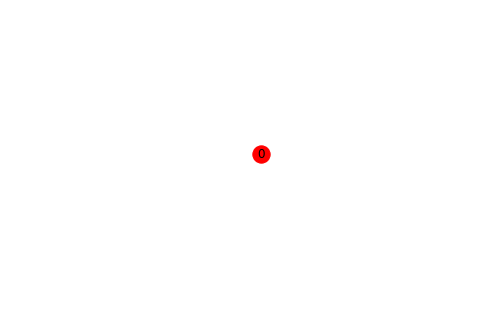

In [12]:
nx.draw(G0, with_labels=True)
plt.show()

In [18]:
MyNodeList = [1, 2, 3, 4]
G0.add_nodes_from(MyNodeList)

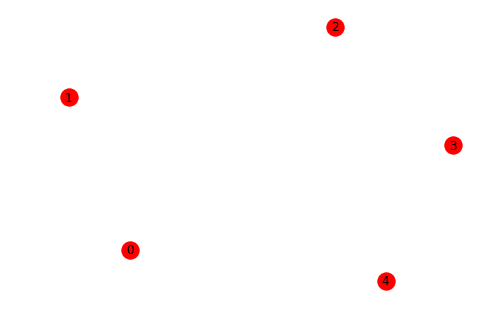

In [19]:
nx.draw(G0, with_labels=True)
plt.show()

---

In [20]:
G1 = nx.Graph()

In [21]:
MyEdgeList = [(0, 1), (0, 2), (0, 3),
              (1, 2), (1, 3), (1, 4),
              (2, 3),
              (3, 4),
              (5, 6), (5, 'spam'),
              (6, 'spam')]
G1.add_edges_from(MyEdgeList)

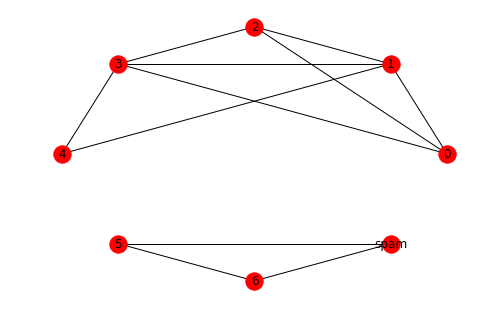

In [22]:
nx.draw(G1, with_labels=True, pos=nx.circular_layout(G1))
#plt.savefig("NetworkExampleG1.png", format="png",
#            transparent=True, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [23]:
list(G1.nodes())

[0, 1, 2, 3, 4, 5, 6, 'spam']

In [24]:
list(G1.edges())

[(0, 1),
 (0, 2),
 (0, 3),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (3, 4),
 (5, 6),
 (5, 'spam'),
 (6, 'spam')]

In [25]:
list(nx.connected_components(G1))

[{0, 1, 2, 3, 4}, {'spam', 5, 6}]

In [26]:
nx.average_shortest_path_length(G1)

NetworkXError: Graph is not connected.

In [27]:
nx.average_shortest_path_length?

In [28]:
nx.average_shortest_path_length??

In [29]:
nx.average_clustering(G1)

0.9166666666666666

In [30]:
G1.add_edge(2, 6)

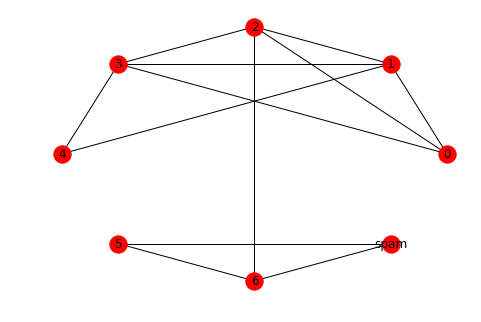

In [31]:
nx.draw(G1, with_labels=True, pos=nx.circular_layout(G1))
plt.show()

In [32]:
nx.average_shortest_path_length(G1)

1.9642857142857142

In [33]:
nx.average_clustering(G1)

0.7708333333333333

In [34]:
nx.shortest_path(G1, 1, 'spam')

[1, 2, 6, 'spam']

#### Degree distribution:

In [35]:
N = G1.number_of_nodes()
print (N)

8


In [36]:
G1.degree()

DegreeView({0: 3, 1: 4, 2: 4, 3: 4, 4: 2, 5: 2, 6: 3, 'spam': 2})

In [37]:
for elem in G1.degree():
    print (elem)

(0, 3)
(1, 4)
(2, 4)
(3, 4)
(4, 2)
(5, 2)
(6, 3)
('spam', 2)


In [38]:
for node, deg in G1.degree():
    print (node, deg)

0 3
1 4
2 4
3 4
4 2
5 2
6 3
spam 2


In [39]:
a_list = []
for node, deg in G1.degree():
    a_list.append(deg)
print (a_list)

[3, 4, 4, 4, 2, 2, 3, 2]


In [40]:
[deg for node, deg in G1.degree()]

[3, 4, 4, 4, 2, 2, 3, 2]

In [41]:
deg_seq = sorted([deg for node, deg in G1.degree()], reverse=True)

In [42]:
deg_seq

[4, 4, 4, 3, 3, 2, 2, 2]

In [43]:
collections.Counter?

In [44]:
deg_count = collections.Counter(deg_seq)

In [45]:
deg_count

Counter({2: 3, 3: 2, 4: 3})

In [46]:
k_list, cnt = zip(*deg_count.items())

https://docs.python.org/3.3/library/functions.html#zip

In [47]:
k_list

(4, 3, 2)

In [48]:
cnt

(3, 2, 3)

In [49]:
Pk = [_/N for _ in cnt]

In [50]:
Pk

[0.375, 0.25, 0.375]

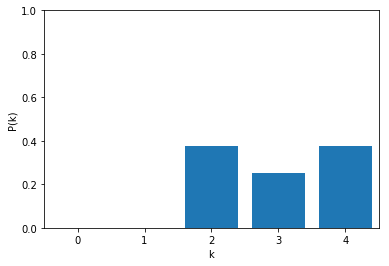

In [51]:
plt.bar(k_list, Pk, width=0.8, color="C0")

plt.xlabel("k")
plt.ylabel("P(k)")

plt.xlim([-0.5, max(k_list)+0.5])
plt.ylim([0, 1])

plt.show()

---

Graph types:
<br>
 - Graph :  Undirected simple (allows self loops)
 - DiGraph :  Directed simple (allows self loops)
 - MultiGraph :  Undirected with parallel edges
 - MultiDiGraph :  Directed with parallel edges

In [52]:
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()